In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

def bk(x, y):
    p = figure(plot_width=400, plot_height=400)
    p.circle(x, y, size=5, color="navy", alpha=0.5)
    show(p)

Loading BokehJS ...

In [2]:
kdata = np.load('KeplerSampleFullQ.npy',encoding='bytes')
print(kdata.shape)
print(len(kdata[250][0]))

(2500, 3)
3534


In [3]:
import os
dmints = [-1.2,-0.3,-0.1,-0.05, -0.02,-0.01, -0.006, -0.005, -0.004, -0.0012, 
          -0.001, -0.0006, -0.0003, 0,  0.0003, 0.0006, 0.001, 0.0012, 0.003, 
          0.004, 0.005, 0.006, 0.01, 0.02, 0.05, 0.1, 0.3, 0.6, 1.2]
dtints = [-1.0/145, 1.0/47, 2.0/47, 3.0/47, 4.0/47, 6.0/47, 10.0/47, 15.0/47,
          20.0/47, 30.0/47, 40.0/47,   1.0,   1.2,  
           1.4,  1.5, 1.7,  2, 2.25,  2.5, 3.0, 4, 6 , 9, 15, 20, 30, 45, 60, 90]

def pairwisediffs(arrayoned):
    x = arrayoned.reshape((1,len(arrayoned)))
    xdm = x[:] - np.transpose(x[:])
    xd = xdm[np.triu_indices(len(x[0]), k = 1)]
    return(xd)
def get2dhist(lightcurve):
    xd = pairwisediffs(lightcurve[0])
    yd = pairwisediffs(lightcurve[1])
    H,xe,ye = np.histogram2d(xd,yd,bins=[dtints,dmints],range=None,normed=False)
    G = 255*H/np.sum(H)
    return G

def load_data():
    data = []
    for file in os.listdir("full_dmdt"):
        data.append(np.load("full_dmdt/"+file))
    data = np.array(data)
    return data
        
data = load_data()
        

In [4]:
import umap
import sklearn
from sklearn.manifold import TSNE
tt = data.reshape(2500, 784)
x_embedded_tsne_first = TSNE(n_components=2).fit_transform(tt)
x_embedded_umap_first = umap.UMAP().fit_transform(tt)
# plt.scatter(x_embedded_tsne_first[:, 0], x_embedded_tsne_first[:, 1], s=1)
bk(x_embedded_tsne_first[:, 0], x_embedded_tsne_first[:, 1])

In [5]:
bk(x_embedded_umap_first[:, 0], x_embedded_umap_first[:, 1])


# first 30 points

In [6]:
kdata = np.load('KeplerSampleFullQ.npy',encoding='bytes')
print(kdata.shape)
print(len(kdata[250][0]))

(2500, 3)
3534


In [7]:
kdata[0][0].shape

(3534,)

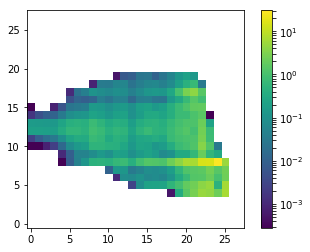

In [8]:
normalized_x_flux = []
normalized_y_flux = []
for i, _ in enumerate(kdata):
    if len(kdata[i][1]) == 3534:
        normalized_x_flux.append(kdata[i][0])
        normalized_y_flux.append(kdata[i][1])
    
nx = np.array(normalized_x_flux)
ny = np.array(normalized_y_flux)
nx = nx[:, :1350]
ny = ny[:, :1350]

fastdmdt = get2dhist([nx[0],ny[0]])
plt.imshow(fastdmdt.T,  norm = LogNorm(), origin="lower")
plt.colorbar()

In [9]:
def first_n_points(n, dir_name):
    normalized_x_flux = []
    normalized_y_flux = []
    for i, _ in enumerate(kdata):
        if len(kdata[i][1]) == 3534:
            normalized_x_flux.append(kdata[i][0])
            normalized_y_flux.append(kdata[i][1])

    nx = np.array(normalized_x_flux)
    ny = np.array(normalized_y_flux)
    nx = nx[:, :n]
    ny = ny[:, :n]
    data = []
    for i, _ in enumerate(nx):
        fastdmdt = get2dhist([nx[i],ny[i]])
        np.save(dir_name + "/" + str(i), fastdmdt.T)
        data.append(fastdmdt)
                            
                              
    return np.array(data)

points_30 = first_n_points(30, "full_30_points")
print points_30.shape

(2196, 28, 28)


In [10]:
tt = points_30.reshape(2196, 784)
x_embedded_tsne_first = TSNE(n_components=2).fit_transform(tt)
x_embedded_umap_first = umap.UMAP().fit_transform(tt)
bk(x_embedded_tsne_first[:, 0], x_embedded_tsne_first[:, 1])

In [11]:
bk(x_embedded_umap_first[:, 0], x_embedded_umap_first[:, 1])

# random 1/2 of the points

In [12]:
import random
def random_n_points(n, dir_name):
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
    
    normalized_x_flux = []
    normalized_y_flux = []
    for i, _ in enumerate(kdata):
        if len(kdata[i][1]) == 3534:
            normalized_x_flux.append(kdata[i][0])
            normalized_y_flux.append(kdata[i][1])

    nx = np.array(normalized_x_flux)
    ny = np.array(normalized_y_flux)
    start = random.randint(1, len(normalized_x_flux[0])-n)
    random_x_points = nx[:, start: start+n]
    random_y_points = ny[:, start: start+n]

    data = []
    for i, _ in enumerate(nx):
        fastdmdt = get2dhist([random_x_points[i],random_y_points[i]])
        np.save(dir_name + "/" + str(i), fastdmdt.T)
        data.append(fastdmdt)
        if i%500 == 0:
            print "ON ITERATION " + str(i)
                            
                              
    return np.array(data)

r_half_points = random_n_points(1090, "random_half_points")
print r_half_points.shape

ON ITERATION 0
ON ITERATION 500
ON ITERATION 1000
ON ITERATION 1500
ON ITERATION 2000
(2196, 28, 28)


In [13]:
tt = r_half_points.reshape(2196, 784)
x_embedded_tsne_first = TSNE(n_components=2).fit_transform(tt)
x_embedded_umap_first = umap.UMAP().fit_transform(tt)
bk(x_embedded_tsne_first[:, 0], x_embedded_tsne_first[:, 1])

In [14]:
bk(x_embedded_umap_first[:, 0], x_embedded_umap_first[:, 1])

In [15]:
bk(x_embedded_umap_first[:, 0], x_embedded_umap_first[:, 1])

# playing with perplexity

In [16]:
x_embedded_tsne_first = TSNE(n_components=2, perplexity=50).fit_transform(tt)
bk(x_embedded_tsne_first[:, 0], x_embedded_tsne_first[:, 1])

In [17]:
x_embedded_tsne_first = TSNE(n_components=2, perplexity=60).fit_transform(tt)
bk(x_embedded_tsne_first[:, 0], x_embedded_tsne_first[:, 1])

In [18]:
x_embedded_tsne_first = TSNE(n_components=2, perplexity=100).fit_transform(tt)
bk(x_embedded_tsne_first[:, 0], x_embedded_tsne_first[:, 1])

In [19]:
x_embedded_tsne_first = TSNE(n_components=2, perplexity=20).fit_transform(tt)
bk(x_embedded_tsne_first[:, 0], x_embedded_tsne_first[:, 1])

In [20]:
x_embedded_umap_first = umap.UMAP(n_neighbors=60).fit_transform(tt)
bk(x_embedded_umap_first[:, 0], x_embedded_umap_first[:, 1])

In [21]:
x_embedded_umap_first = umap.UMAP(n_neighbors=100).fit_transform(tt)
bk(x_embedded_umap_first[:, 0], x_embedded_umap_first[:, 1])

In [22]:
x_embedded_umap_first = umap.UMAP(n_neighbors=20).fit_transform(tt)
bk(x_embedded_umap_first[:, 0], x_embedded_umap_first[:, 1])